## Build Deep Convolutional Neural Network from Scratch
* 4 Convolution Layers, Followed by ReLU
* 2 Max Pooling Layers
* 2 Fully Connected Layers

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# define deep CNN architecture
class DeepCNN(nn.Module):
 def __init__(self):
  super(DeepCNN, self).__init__()
  
  # original concolutional layers
  self.conv1_in_channels = 3
  self.conv1_out_channels = 8
  self.conv1_kernel_size = 3
  self.conv1 = nn.Conv2d(self.conv1_in_channels, self.conv1_out_channels, kernel_size=self.conv1_kernel_size)
  
  self.conv2_in_channels = self.conv1_out_channels
  self.conv2_out_channels = 16
  self.conv2_kernel_size = 2
  self.conv2 = nn.Conv2d(self.conv2_in_channels, self.conv2_out_channels, kernel_size=self.conv2_kernel_size)
  
  self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
  
  # 2 additional convolutional layers
  self.conv3_in_channels = self.conv2_out_channels
  self.conv3_out_channels = 32
  self.conv3_kernel_size = 2
  self.conv3 = nn.Conv2d(self.conv3_in_channels, self.conv3_out_channels, kernel_size=self.conv3_kernel_size)
  
  self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
  
  self.conv4_in_channels = self.conv3_out_channels
  self.conv4_out_channels = 64
  self.conv4_kernel_size = 1
  self.conv4 = nn.Conv2d(self.conv4_in_channels, self.conv4_out_channels, kernel_size=self.conv4_kernel_size)
  
  # fully connected layers
  self.fc1_in_features = self.conv4_out_channels * 6 * 6 # 6x6 image dimension - found using model summary - look at tbe last conv layer output
  self.fc1_out_features = 100
  self.fc1 = nn.Linear(self.fc1_in_features, self.fc1_out_features)
  
  self.fc2_in_features = self.fc1_out_features
  self.fc2_out_features = 10
  self.fc2 = nn.Linear(self.fc2_in_features, self.fc2_out_features)
  
 def forward(self, x):
  x = self.conv1(x)
  x = F.relu(x)
  
  x = self.conv2(x)
  x = F.relu(x)
  x = self.pool1(x)
  
  # additional convolutional layer
  x = self.conv3(x)
  x = F.relu(x)
  x = self.pool2(x)
  
  x = self.conv4(x)
  x = F.relu(x)
  
  # flatten layer: reshape the fully connected layer
  x = x.view(-1, self.fc1_in_features)
  
  # fully connected layers
  x = self.fc1(x)
  x = F.relu(x)
  x = self.fc2(x)
  
  return x

In [8]:
model = DeepCNN()
print(model)

DeepCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

In [10]:
from torchsummary import summary
summary(model, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 8, 30, 30]           224
├─Conv2d: 1-2                            [-1, 16, 29, 29]          528
├─MaxPool2d: 1-3                         [-1, 16, 14, 14]          --
├─Conv2d: 1-4                            [-1, 32, 13, 13]          2,080
├─MaxPool2d: 1-5                         [-1, 32, 6, 6]            --
├─Conv2d: 1-6                            [-1, 64, 6, 6]            2,112
├─Linear: 1-7                            [-1, 100]                 230,500
├─Linear: 1-8                            [-1, 10]                  1,010
Total params: 236,454
Trainable params: 236,454
Non-trainable params: 0
Total mult-adds (M): 1.28
Input size (MB): 0.01
Forward/backward pass size (MB): 0.22
Params size (MB): 0.90
Estimated Total Size (MB): 1.13


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 8, 30, 30]           224
├─Conv2d: 1-2                            [-1, 16, 29, 29]          528
├─MaxPool2d: 1-3                         [-1, 16, 14, 14]          --
├─Conv2d: 1-4                            [-1, 32, 13, 13]          2,080
├─MaxPool2d: 1-5                         [-1, 32, 6, 6]            --
├─Conv2d: 1-6                            [-1, 64, 6, 6]            2,112
├─Linear: 1-7                            [-1, 100]                 230,500
├─Linear: 1-8                            [-1, 10]                  1,010
Total params: 236,454
Trainable params: 236,454
Non-trainable params: 0
Total mult-adds (M): 1.28
Input size (MB): 0.01
Forward/backward pass size (MB): 0.22
Params size (MB): 0.90
Estimated Total Size (MB): 1.13

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision

# define the transformation
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.RandomResizedCrop(32, scale=(0.8, 1.0), ratio=(1.0, 1.0)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [12]:
# load the CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
print("trainset size: ", len(trainset))
print("testset size: ", len(testset))

trainset size:  50000
testset size:  10000


In [14]:
# hyperparameters
import torch.optim as optim

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [15]:
# training loop
for epoch in range(30):
 train_loss = 0.0 # initialize the training loss
 train_acc = 0.0 # initialize the training accuracy
 
 model.train() # set the model to training mode
 
 # iterate over the training data
 for i, (inputs, labels) in enumerate(trainloader):
  # move inputs and labels to the device
  inputs, labels = inputs.to(device), labels.to(device)
  
  # zero the parameter gradients
  optimizer.zero_grad()
  
  # forward pass
  outputs = model(inputs)
  
  # calculate the loss
  loss = criterion(outputs, labels)
  
  # backward pass
  loss.backward()
  
  # optimize
  optimizer.step()
  
  # calculate the training loss
  train_loss += loss.item()
  
  # calculate the training accuracy
  _, preds = torch.max(outputs, 1)
  train_acc += (preds == labels).float().mean()
  
 train_loss /= i + 1 # calculate the average training loss
 train_acc /= i + 1 # calculate the average training accuracy
 
 scheduler.step() # decay the learning rate by a factor of 0.1 every 7 epochs
 
 # print the training loss and accuracy
 print(f"Epoch {epoch + 1}/{10}, loss: {train_loss}, accuracy: {train_acc}")

Epoch 1/10, loss: 1.6000586784362794, accuracy: 0.4155399799346924
Epoch 2/10, loss: 1.3195285240745545, accuracy: 0.5290799736976624
Epoch 3/10, loss: 1.210478505973816, accuracy: 0.5728600025177002
Epoch 4/10, loss: 1.144288551530838, accuracy: 0.5978400111198425
Epoch 5/10, loss: 1.0946241142463684, accuracy: 0.6164799928665161
Epoch 6/10, loss: 1.0716942414569854, accuracy: 0.6253399848937988
Epoch 7/10, loss: 1.0389714482688903, accuracy: 0.6359999775886536
Epoch 8/10, loss: 0.9618984363412857, accuracy: 0.6628599762916565
Epoch 9/10, loss: 0.9420968507003784, accuracy: 0.6698799729347229
Epoch 10/10, loss: 0.9359991390419007, accuracy: 0.6733799576759338
Epoch 11/10, loss: 0.9298970175743103, accuracy: 0.6741999983787537
Epoch 12/10, loss: 0.9218539697742462, accuracy: 0.6784999966621399
Epoch 13/10, loss: 0.9182490022611618, accuracy: 0.6810399889945984
Epoch 14/10, loss: 0.9133122575664521, accuracy: 0.6813799738883972
Epoch 15/10, loss: 0.9018590635538101, accuracy: 0.68707996

In [16]:
# validate the model on the test data
with torch.no_grad(): # disable gradient calculation to speed up the process
 correct = 0 # initialize the number of correct predictions
 total = 0
 for images, labels in testloader: # iterate over the test data
  images, labels = images.to(device), labels.to(device) # move the images and labels to the device
  outputs = model(images) # forward pass: compute model predictions
  _, predicted = torch.max(outputs.data, 1) # get the predicted class index
  total += labels.size(0) # increment the total count by the batch size
  correct += (predicted == labels).sum().item() # count the number of correct predictions in the batch
 
 # print the test accuracy
 print(f"Test accuracy: {100 * correct / total} %")

Test accuracy: 66.85 %


In [17]:

from sklearn.metrics import confusion_matrix, classification_report
import plotly.figure_factory as ff # for visualization
import numpy as np

# evaluation loop
model.eval() # set the model to evaluation mode
all_preds = [] # list to store all predictions
all_labels = [] # list to store all labels

# iterate over the test data
with torch.no_grad():
 for inputs, labels in testloader:
  inputs, labels = inputs.to(device), labels.to(device) # move the inputs and labels to the device
  outputs = model(inputs) # forward pass: compute model predictions
  _, preds = torch.max(outputs, 1) # get the predicted class index
  all_preds.extend(preds.cpu().numpy()) # store the predictions
  all_labels.extend(labels.cpu().numpy()) # store the labels

# convert the predictions and labels to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# generate and plot the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds, normalize='true')

# plot the confusion matrix using plotly
fig = ff.create_annotated_heatmap(z=conf_matrix, # data for the heatmap
                                  x=classes, # x-axis labels
                                  y=classes, # y-axis labels
                                  colorscale='Viridis', # color scale for the heatmap
                                  showscale=True) # show the color scale

# update layout of the plot
fig.update_layout(title_text='Confusion Matrix', # title of the plot
                  xaxis=dict(title='Predicted labels'), # x-axis title
                  yaxis=dict(title='True labels')) # y-axis title

fig.show()

# generate and print the classification report
class_report = classification_report(all_labels, all_preds, target_names=classes)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       plane       0.69      0.73      0.71      1000
         car       0.78      0.77      0.77      1000
        bird       0.59      0.52      0.55      1000
         cat       0.49      0.45      0.47      1000
        deer       0.59      0.61      0.60      1000
         dog       0.56      0.56      0.56      1000
        frog       0.70      0.76      0.73      1000
       horse       0.69      0.70      0.70      1000
        ship       0.78      0.79      0.78      1000
       truck       0.74      0.76      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



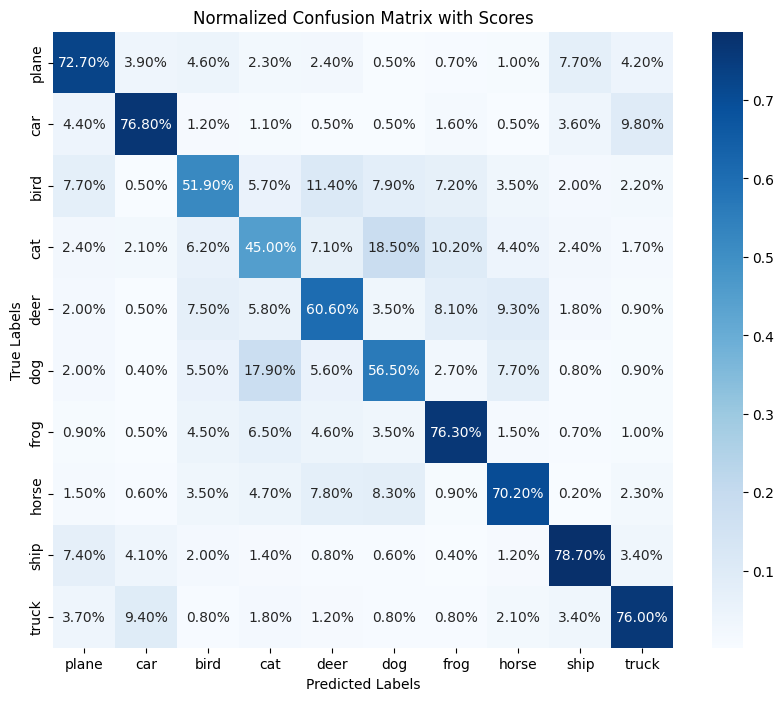

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# we already have all_preds and all_labels

# create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# normalize the confusion matrix to show percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Normalized Confusion Matrix with Scores")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()